***CNN COVID-19 DETECTION***

In this study, I aimed to present the use of deep learning for the high-accuracy detection of COVID-19 using chest X-ray images. Publicly available X-ray images (2301 X-chest ray records between healthy and confirmed COVID-19) were used in the experiments, which involved the training of deep learning and machine learning classifiers. 
The experiment was performed using five machine learning models: 3 CNN with different depths and layers, followed by the Alexnet model. Accuracy and loss values were compared. The most efficient model was, finally, tested for predicting on new data.

***Import Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.utils import to_categorical
from keras import optimizers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

import tensorflow_addons as tfa
from tensorflow.keras.metrics import Metric
from tensorflow_addons.utils.types import AcceptableDTypes, FloatTensorLike
from typeguard import typechecked
from typing import Optional

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as numpy
import matplotlib.pyplot as pyplot
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

***Clone & Explore dataset***

In [ ]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 42.71 MiB/s, done.
Checking out files: 100% (2295/2295), done.


In [ ]:
#set the path to the main dir
import os
main_dir = "/content/datasets/Data"
#set the path to the train dir
train_dir = os.path.join(main_dir,'train')
#set the path to the test dir
test_dir = os.path.join(main_dir,'test')
#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')
#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')
#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, 'COVID19')
#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID19(456).jpg', 'COVID19(366).jpg', 'COVID19(59).jpg', 'COVID19(461).jpg', 'COVID19(342).jpg', 'COVID19(151).jpg', 'COVID19(195).jpg', 'COVID19(72).jpg', 'COVID19(325).jpg', 'COVID19(60).jpg']
['NORMAL(80).jpg', 'NORMAL(918).jpg', 'NORMAL(1312).jpg', 'NORMAL(1404).jpg', 'NORMAL(961).jpg', 'NORMAL(1412).jpg', 'NORMAL(311).jpg', 'NORMAL(829).jpg', 'NORMAL(1295).jpg', 'NORMAL(1407).jpg']
['COVID19(396).jpg', 'COVID-19 (750).jpg', 'COVID19(433).jpg', 'COVID-19 (875).jpg', 'COVID-19 (791).jpg', 'COVID-19 (871).jpg', 'COVID19(385).jpg', 'COVID-19 (809).jpg', 'COVID-19 (371).jpg', 'COVID19(391).jpg']
['NORMAL(1136).jpg', 'NORMAL(1165).jpg', 'NORMAL(889).jpg', 'NORMAL(731).jpg', 'NORMAL(1037).jpg', 'NORMAL(211).jpg', 'NORMAL(435).jpg', 'NORMAL(1287).jpg', 'NORMAL(10).jpg', 'NORMAL(151).jpg']


In [ ]:
#print the total no of images present in each dir
print("Total images in the training set:", len(train_covid_names+train_normal_names))
print("Total images in the test set:", len(test_covid_names+test_normal_names))

Total images in the training set: 1811
Total images in the test set: 484


***Data Visualization***

In [ ]:
#get the filenames from the covid & normal dir of the train dataset
covid_pic =[os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pic =[os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)

['/content/datasets/Data/train/COVID19/COVID19(456).jpg', '/content/datasets/Data/train/COVID19/COVID19(366).jpg', '/content/datasets/Data/train/COVID19/COVID19(59).jpg', '/content/datasets/Data/train/COVID19/COVID19(461).jpg', '/content/datasets/Data/train/COVID19/COVID19(342).jpg', '/content/datasets/Data/train/COVID19/COVID19(151).jpg', '/content/datasets/Data/train/COVID19/COVID19(195).jpg', '/content/datasets/Data/train/COVID19/COVID19(72).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(80).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(918).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1312).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1404).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(961).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1412).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(311).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(829).jpg']


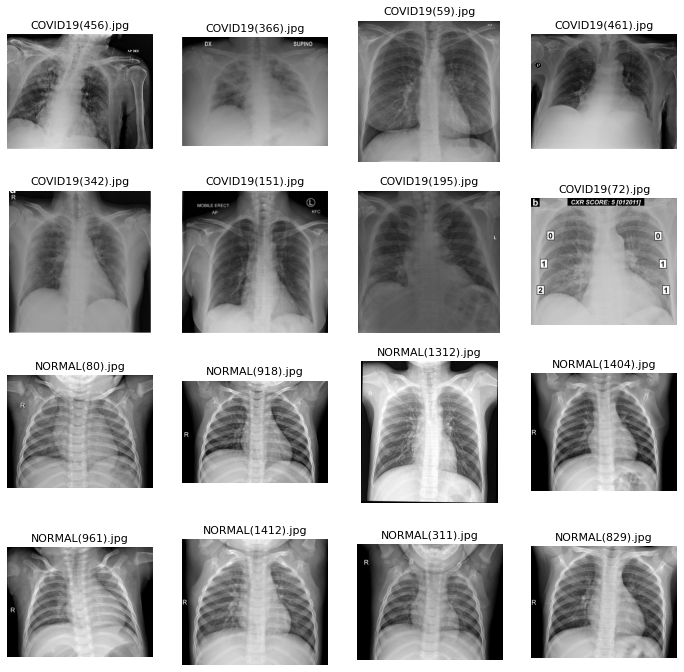

In [ ]:
import matplotlib.pyplot as plt
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12,12)
#merge the covid and normal list
merged_list = covid_pic+normal_pic
for i , img_path in enumerate(merged_list):
  data= img_path.split('/', 6)[6]
  sp = plt.subplot(rows, cols, i + 1 )
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=11)
  plt.imshow(img,cmap='gray')

  plt.show

***Data Preprocessing & Augmentation***

Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.

In [ ]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale =1./255,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                horizontal_flip =True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale =1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset='training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 subset='validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_test.flow_from_directory(test_dir,
                                                 target_size=(150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [ ]:
#get the class indices
train_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [ ]:
#get the image shape
train_generator.image_shape

(150, 150, 3)

***Build Convolutional Neural Network Model***

We use three different network architectures
with varying numbers of convolutional and fully connected
layers, and basic image pre-processing techniques to test
the results using various structures and pre-processing
methods.

***ConvNet1***

The first structure (ConvNet1) consisted of two convolutional
layers with 64 and 16 filters, respectively, with three
fully connected (dense) layers with 128, 8 and 1 neurons. One flatten layer in the middle.

In [ ]:
model_1 = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model_1.add(Conv2D(64,(3,3), padding='SAME', activation='relu', input_shape=(150,150,3)))
# pooling layer
model_1.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model_1.add(Dropout(0.2))
# add the second convolutional layer
model_1.add(Conv2D(16,(3,3), padding='SAME', activation='relu'))
# pooling layer
model_1.add(MaxPooling2D(pool_size=(1,1)))
# place a dropout layer
model_1.add(Dropout(0.2))
# Flatten layer
model_1.add(Flatten())
# add two dense layers : amount of nodes, activation
model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(8, activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model_1.add(Dropout(0.5))
model_1.add(Dense(1,activation='sigmoid'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 16)        9232      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 90000)             0

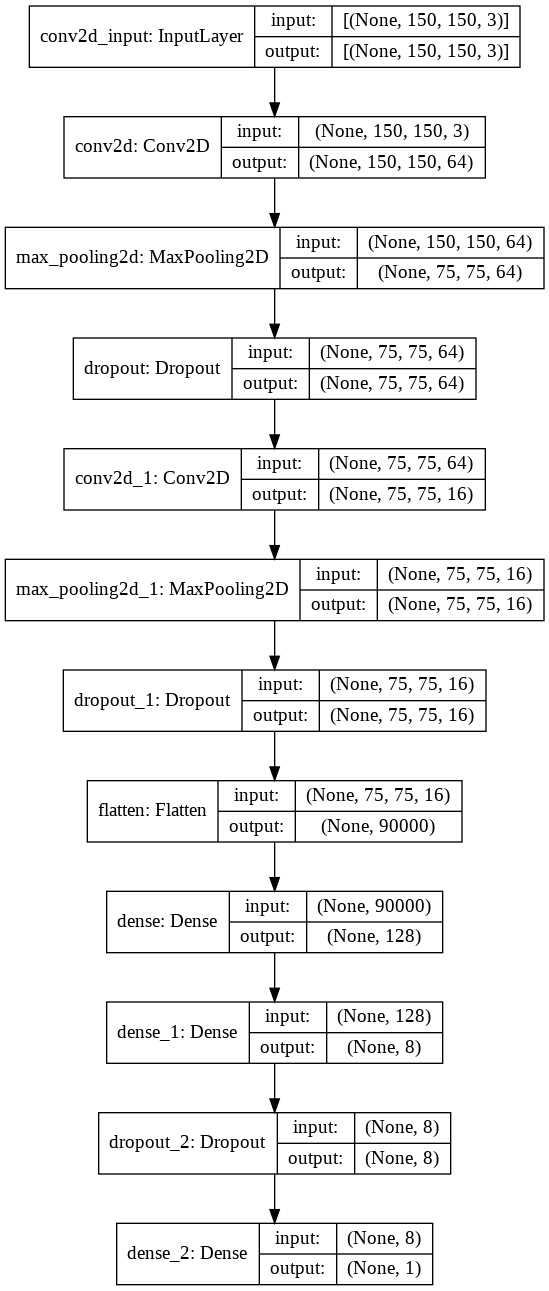

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, 'CNN1model.png', show_shapes=True)

***ConvNet2***

ConvNet2, was the second architecture in this study and consisted of two convolutional layers (32 and 64 filters), 1 flatten layer and two fully connected layers (256 and 1 neurons). It was the lightest architecture considered in this study.

In [ ]:
model_2 = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model_2.add(Conv2D(32,(5,5), padding='SAME', activation='relu', input_shape=(150,150,3)))
# pooling layer
model_2.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model_2.add(Dropout(0.5))
# add another convolutional layer
model_2.add(Conv2D(64,(5,5), padding='SAME', activation='relu'))
# pooling layer
model_2.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model_2.add(Dropout(0.5))
# Flatten layer
model_2.add(Flatten())
# add a dense layer : amount of nodes, activation
model_2.add(Dense(256, activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model_2.add(Dropout(0.5))
model_2.add(Dense(1,activation='sigmoid'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 87616)            

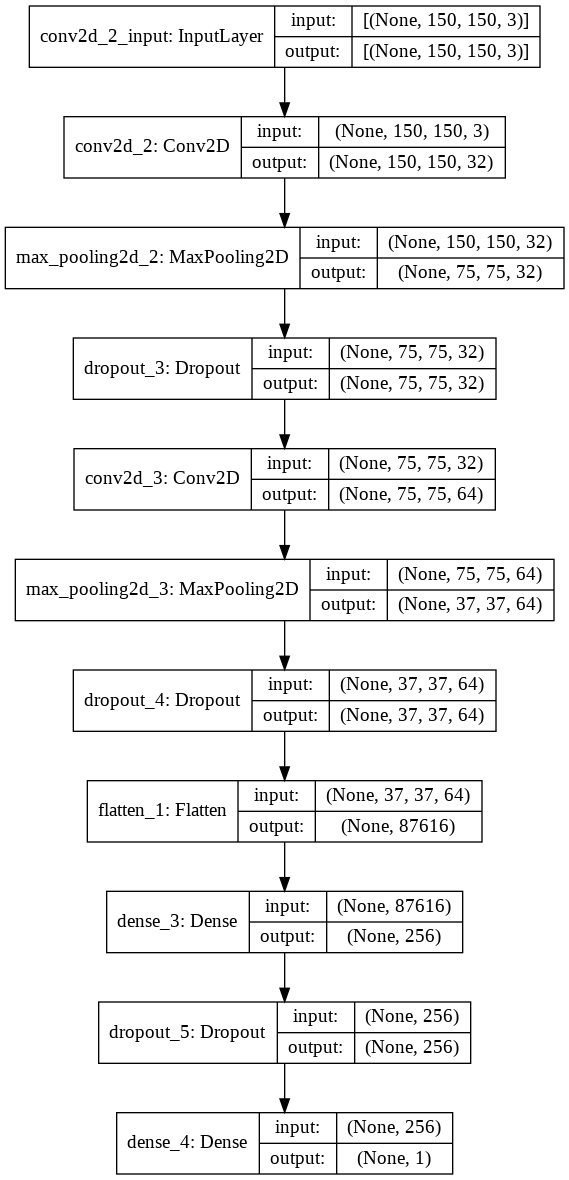

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, 'CNN2model.png', show_shapes=True)

***ConvNet3***

ConvNet3, was the deepest architecture in this
study and consisted of four convolutional layers (256, 128, 128,
and 64 filters), one flatten layer and four fully connected layers (128, 64, 8 and 1 neurons).

In [ ]:
model_3 = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model_3.add(Conv2D(256,(3,3), padding='SAME', activation='relu', input_shape=(150,150,3)))
# pooling layer
model_3.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model_3.add(Dropout(0.2))
# add the second convolutional layer
model_3.add(Conv2D(128,(3,3), padding='SAME', activation='relu'))
# pooling layer
model_3.add(MaxPooling2D(pool_size=(2,2)))
# place a dropout layer
model_3.add(Dropout(0.2))
# add the third convolutional layer
model_3.add(Conv2D(128,(2,2), padding='SAME', activation='relu'))
# pooling layer
model_3.add(MaxPooling2D(pool_size=(1,1)))
# place a dropout layer
model_3.add(Dropout(0.2))
# add the fourth convolutional layer
model_3.add(Conv2D(64,(1,1), padding='SAME', activation='relu'))
# pooling layer
model_3.add(MaxPooling2D(pool_size=(1,1)))
# place a dropout layer
model_3.add(Dropout(0.2))
# Flatten layer
model_3.add(Flatten())
# add three dense layers : amount of nodes, activation
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(8,activation='relu'))
# place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model_3.add(Dropout(0.5))
model_3.add(Dense(1,activation='sigmoid'))
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 256)     7168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 256)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 75, 75, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 128)       295040    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 128)      

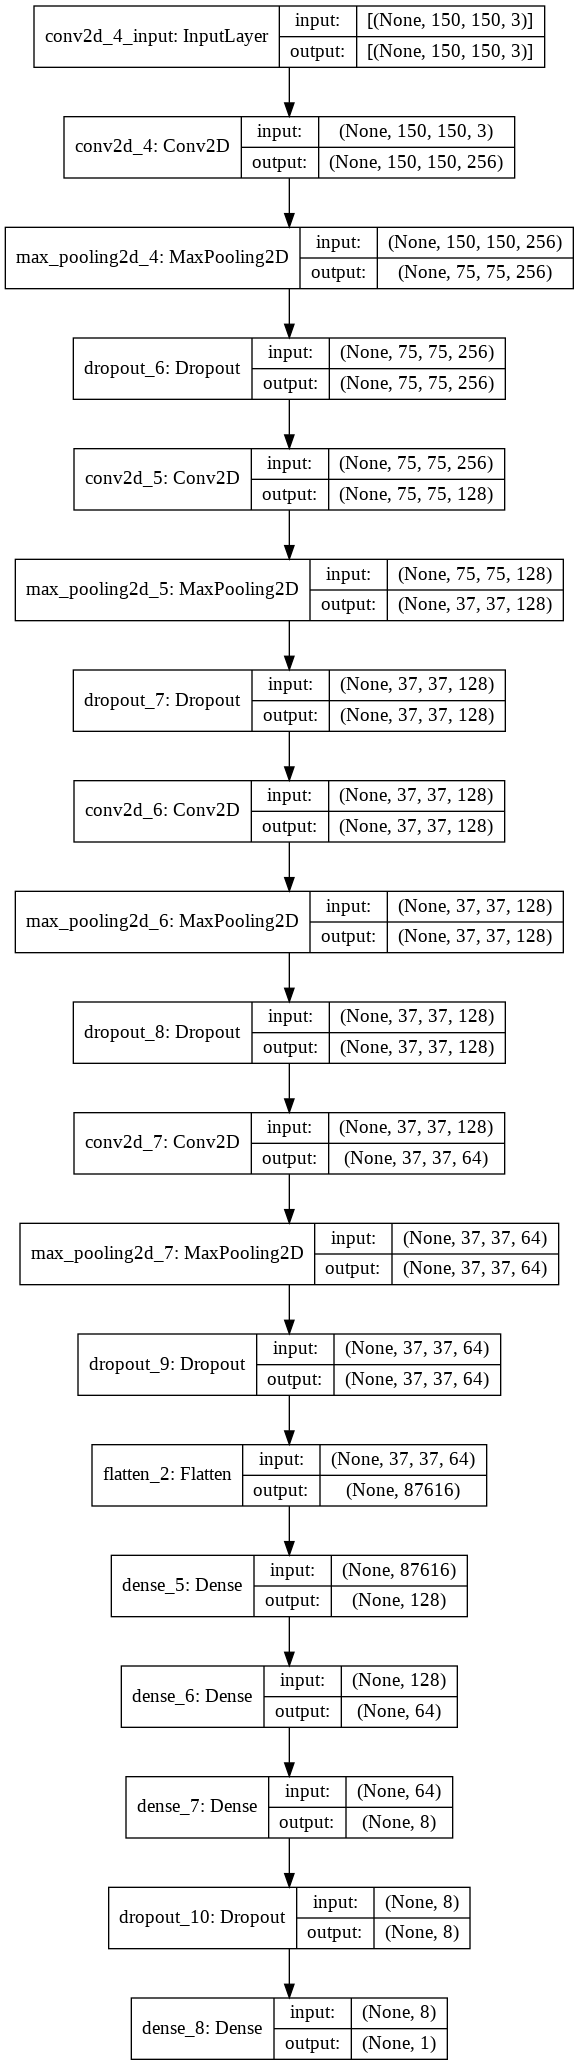

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, 'CNN3model.png', show_shapes=True)

***Compile & Train the 3 CNN Models***

To amplify our understanding of the modekl and their performance, we assessed different metrics: loss function, accuracy, precision, recall anmd F1 scores.

In [ ]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
        f1_score,
]

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 5) # when i run it for 50 epochs

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [ ]:
#compile the CNN1 model
model_1.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=METRICS)

In [ ]:
#train the CNN1 model
history_1 = model_1.fit(train_generator,
                  epochs=30,
                  validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 53s 988ms/step - loss: 0.8113 - accuracy: 0.6874 - precision: 0.7079 - recall: 0.9512 - auc: 0.5659 - f1_score: 0.8053 - val_loss: 0.6174 - val_accuracy: 0.7238 - val_precision: 0.7167 - val_recall: 1.0000 - val_auc: 0.8725 - val_f1_score: 0.8371
Epoch 2/30
46/46 [==============================] - 45s 969ms/step - loss: 0.5233 - accuracy: 0.6878 - precision: 0.6882 - recall: 0.9991 - auc: 0.7322 - f1_score: 0.8124 - val_loss: 0.3226 - val_accuracy: 0.6989 - val_precision: 0.6989 - val_recall: 1.0000 - val_auc: 0.9672 - val_f1_score: 0.8225
Epoch 3/30
46/46 [==============================] - 44s 971ms/step - loss: 0.4726 - accuracy: 0.6954 - precision: 0.6954 - recall: 1.0000 - auc: 0.7812 - f1_score: 0.8142 - val_loss: 0.2933 - val_accuracy: 0.6989 - val_precision: 0.6989 - val_recall: 1.0000 - val_auc: 0.9783 - val_f1_score: 0.8112
Epoch 4/30
46/46 [==============================] - 44s 969ms/step - loss: 0.3800 - accuracy: 0.7140 - 

In [ ]:
#compile the CNN2 model
model_2.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=METRICS)

In [ ]:
#train the CNN2 model
history_2=model_2.fit(train_generator,
                  epochs=30,
                  validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 47s 996ms/step - loss: 4.9444 - accuracy: 0.7627 - precision: 0.8048 - recall: 0.8826 - auc: 0.7538 - f1_score: 0.6956 - val_loss: 0.5558 - val_accuracy: 0.7320 - val_precision: 0.7241 - val_recall: 0.9960 - val_auc: 0.9095 - val_f1_score: 0.8253
Epoch 2/30
46/46 [==============================] - 44s 970ms/step - loss: 0.4108 - accuracy: 0.8190 - precision: 0.8403 - recall: 0.9107 - auc: 0.8694 - f1_score: 0.8714 - val_loss: 0.3490 - val_accuracy: 0.9254 - val_precision: 0.9484 - val_recall: 0.9447 - val_auc: 0.9766 - val_f1_score: 0.9465
Epoch 3/30
46/46 [==============================] - 45s 976ms/step - loss: 0.2167 - accuracy: 0.9187 - precision: 0.9284 - recall: 0.9576 - auc: 0.9693 - f1_score: 0.9419 - val_loss: 0.1596 - val_accuracy: 0.9558 - val_precision: 0.9759 - val_recall: 0.9605 - val_auc: 0.9865 - val_f1_score: 0.9699
Epoch 4/30
46/46 [==============================] - 44s 969ms/step - loss: 0.1973 - accuracy: 0.9335 - 

In [ ]:
#compile the CNN3 model
model_3.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=METRICS)

In [ ]:
#train the CNN3 model
history_3 = model_3.fit(train_generator,
                  epochs=30,
                  validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 49s 1s/step - loss: 0.6883 - accuracy: 0.8019 - precision: 0.8022 - recall: 0.9621 - auc: 0.8073 - f1_score: 0.7719 - val_loss: 0.5210 - val_accuracy: 0.6989 - val_precision: 0.6989 - val_recall: 1.0000 - val_auc: 0.9245 - val_f1_score: 0.8213
Epoch 2/30
46/46 [==============================] - 46s 1s/step - loss: 0.5436 - accuracy: 0.6830 - precision: 0.6835 - recall: 0.9974 - auc: 0.7135 - f1_score: 0.8113 - val_loss: 0.4138 - val_accuracy: 0.6989 - val_precision: 0.6989 - val_recall: 1.0000 - val_auc: 0.9500 - val_f1_score: 0.8271
Epoch 3/30
46/46 [==============================] - 46s 1s/step - loss: 0.4575 - accuracy: 0.7697 - precision: 0.7681 - recall: 0.9682 - auc: 0.8208 - f1_score: 0.8551 - val_loss: 0.2668 - val_accuracy: 0.9282 - val_precision: 0.9913 - val_recall: 0.9051 - val_auc: 0.9836 - val_f1_score: 0.9487
Epoch 4/30
46/46 [==============================] - 46s 1s/step - loss: 0.4069 - accuracy: 0.8456 - precision: 0

***Model Performance Evaluation***

In [ ]:
#get the keys of history object

history_1.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'f1_score', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc', 'val_f1_score'])

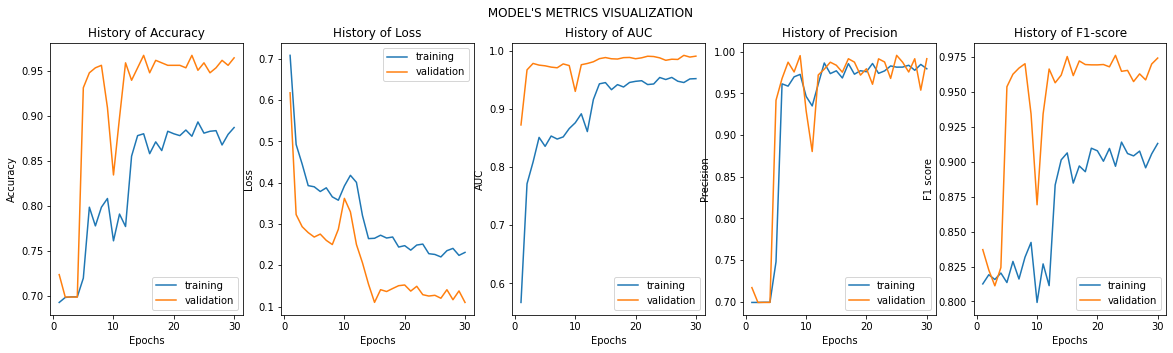

In [ ]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision,f1,val_f1):
  fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
  fig.suptitle(" MODEL'S METRICS VISUALIZATION ")
  ax1.plot(range(1, len(acc) + 1), acc)
  ax1.plot(range(1, len(val_acc) + 1), val_acc)
  ax1.set_title('History of Accuracy')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Accuracy')
  ax1.legend(['training', 'validation'])
  ax2.plot(range(1, len(loss) + 1), loss)
  ax2.plot(range(1, len(val_loss) + 1), val_loss)
  ax2.set_title('History of Loss')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Loss')
  ax2.legend(['training', 'validation'])
    
  ax3.plot(range(1, len(auc) + 1), auc)
  ax3.plot(range(1, len(val_auc) + 1), val_auc)
  ax3.set_title('History of AUC')
  ax3.set_xlabel('Epochs')
  ax3.set_ylabel('AUC')
  ax3.legend(['training', 'validation'])

  ax4.plot(range(1, len(precision) + 1), precision)
  ax4.plot(range(1, len(val_precision) + 1), val_precision)
  ax4.set_title('History of Precision')
  ax4.set_xlabel('Epochs')
  ax4.set_ylabel('Precision')
  ax4.legend(['training', 'validation'])
    
  ax5.plot(range(1, len(f1) + 1), f1)
  ax5.plot(range(1, len(val_f1) + 1), val_f1)
  ax5.set_title('History of F1-score')
  ax5.set_xlabel('Epochs')
  ax5.set_ylabel('F1 score')
  ax5.legend(['training', 'validation'])


  plt.show()

Train_Val_Plot(history_1.history['accuracy'],history_1.history['val_accuracy'],
                 history_1.history['loss'],history_1.history['val_loss'],
                 history_1.history['auc'],history_1.history['val_auc'],
                 history_1.history['precision'],history_1.history['val_precision'],
                 history_1.history['f1_score'],history_1.history['val_f1_score']
                 )  

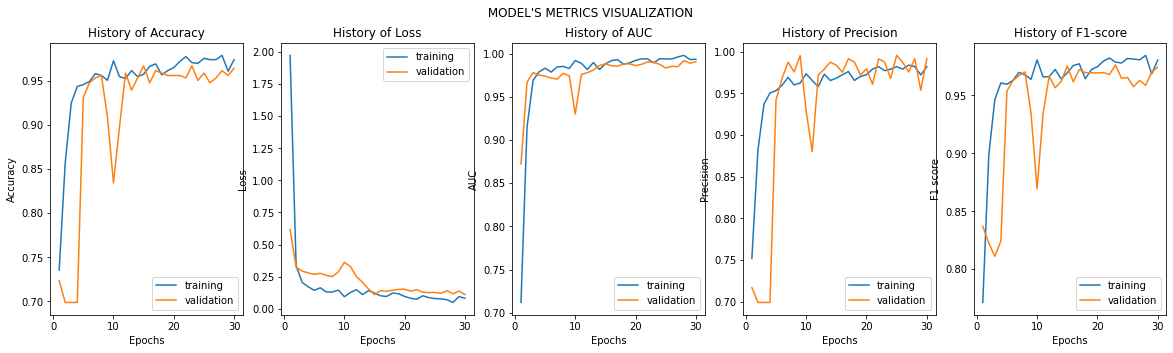

In [ ]:
Train_Val_Plot(history_2.history['accuracy'],history_1.history['val_accuracy'],
                 history_2.history['loss'],history_1.history['val_loss'],
                 history_2.history['auc'],history_1.history['val_auc'],
                 history_2.history['precision'],history_1.history['val_precision'],
                 history_2.history['f1_score'],history_1.history['val_f1_score']
                 )  

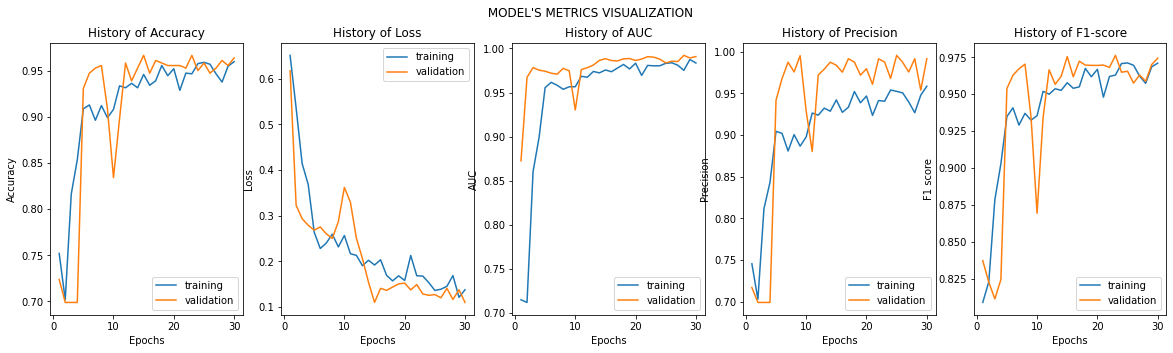

In [ ]:
Train_Val_Plot(history_3.history['accuracy'],history_1.history['val_accuracy'],
                 history_3.history['loss'],history_1.history['val_loss'],
                 history_3.history['auc'],history_1.history['val_auc'],
                 history_3.history['precision'],history_1.history['val_precision'],
                 history_3.history['f1_score'],history_1.history['val_f1_score']
                 )  

***Metrics comparison for Testing dataset***

In [ ]:
scores_1 = model_1.evaluate(test_generator)
scores_2 = model_2.evaluate(test_generator)
scores_3 = model_3.evaluate(test_generator)

16/16 [==============================] - 10s 610ms/step - loss: 0.1122 - accuracy: 0.9690 - precision: 0.9778 - recall: 0.9748 - auc: 0.9911 - f1_score: 0.9769


In [ ]:
print("CNN1 Accuracy = ", scores_1[1])
print("CNN1 Precision = ", scores_1[2])
print("CNN1 Recall = ", scores_1[3])
print("CNN1 AUC = ", scores_1[4])
print("CNN1 F1_score = ", scores_1[5])

CNN1 Accuracy =  0.9669421315193176
CNN1 Precision =  0.9688473343849182
CNN1 Recall =  0.9810725450515747
CNN1 AUC =  0.9906212687492371
CNN1 F1_score =  0.9728795886039734


In [ ]:
print("CNN2 Accuracy = ", scores_2[1])
print("CNN2 Precision = ", scores_2[2])
print("CNN2 Recall = ", scores_2[3])
print("CNN2 AUC = ", scores_2[4])
print("CNN2 F1_score = ", scores_2[5])

CNN2 Accuracy =  0.9669421315193176
CNN2 Precision =  0.9630769491195679
CNN2 Recall =  0.9873816967010498
CNN2 AUC =  0.9952587485313416
CNN2 F1_score =  0.9756021499633789


In [ ]:
print("CNN3 Accuracy = ", scores_3[1])
print("CNN3 Precision = ", scores_3[2])
print("CNN3 Recall = ", scores_3[3])
print("CNN3 AUC = ", scores_3[4])
print("CNN3 F1_score = ", scores_3[5])

CNN3 Accuracy =  0.9690082669258118
CNN3 Precision =  0.9778481125831604
CNN3 Recall =  0.9747633934020996
CNN3 AUC =  0.9911313652992249
CNN3 F1_score =  0.9768765568733215


As we can see, the three model present exellent accuracies. In particular the CNN2 model has the best accuracy value.

***Alexnet model***

AlexNet is one of the first examples of deep convolutional neural networks and it swept the competitions thanks to its high complexity (at the time) and the training procedure that is performed on GPUs.
The first five layers are similar to LeNet layers in a sense. The layers consist of 96 filters with the sizes of 11 x 11, 256 layers with the sizes of 5 x 5, 384 layers with the sizes of 3 x 3, 384 layers with the sizes of 3 x 3, and finally 256 filters with the sizes of 3 x 3, respectively. Unlike LeNet, AlexNet uses ReLU activation function. ReLU does not involve exponentiation operation, which is computationally expensive, thus ReLU is very cheap to calculate. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D,BatchNormalization,LayerNormalization

In [ ]:
model_4 = Sequential()
# 1st Convolutional Layer
model_4.add(Conv2D(filters=96, input_shape=(150,150,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model_4.add(Activation('relu'))
# Pooling 
model_4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model_4.add(BatchNormalization())
# 2nd Convolutional Layer
model_4.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model_4.add(Activation('relu'))
# Pooling
model_4.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model_4.add(BatchNormalization())
# 3rd Convolutional Layer
model_4.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model_4.add(Activation('relu'))
# Batch Normalisation
model_4.add(BatchNormalization())
# 4th Convolutional Layer
model_4.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model_4.add(Activation('relu'))
# Batch Normalisation
model_4.add(BatchNormalization())
# 5th Convolutional Layer
model_4.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model_4.add(Activation('relu'))
# Pooling
model_4.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model_4.add(BatchNormalization())
# Passing it to a dense layer
model_4.add(Flatten())
# 1st Dense Layer
model_4.add(Dense(4096, input_shape=(224*224*3,)))
model_4.add(Activation('relu'))
# Add Dropout to prevent overfitting
model_4.add(Dropout(0.4))
# Batch Normalisation
model_4.add(BatchNormalization())
# 2nd Dense Layer
model_4.add(Dense(4096))
model_4.add(Activation('relu'))
# Add Dropout
model_4.add(Dropout(0.4))
# Batch Normalisation
model_4.add(BatchNormalization())
#  output Layer 
model_4.add(Dense(1000))
model_4.add(Dense(1,activation='sigmoid'))
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 35, 35, 96)        34944     
_________________________________________________________________
activation_47 (Activation)   (None, 35, 35, 96)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 96)        0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 17, 17, 96)        384       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 17, 17, 256)       614656    
_________________________________________________________________
activation_48 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 256)        

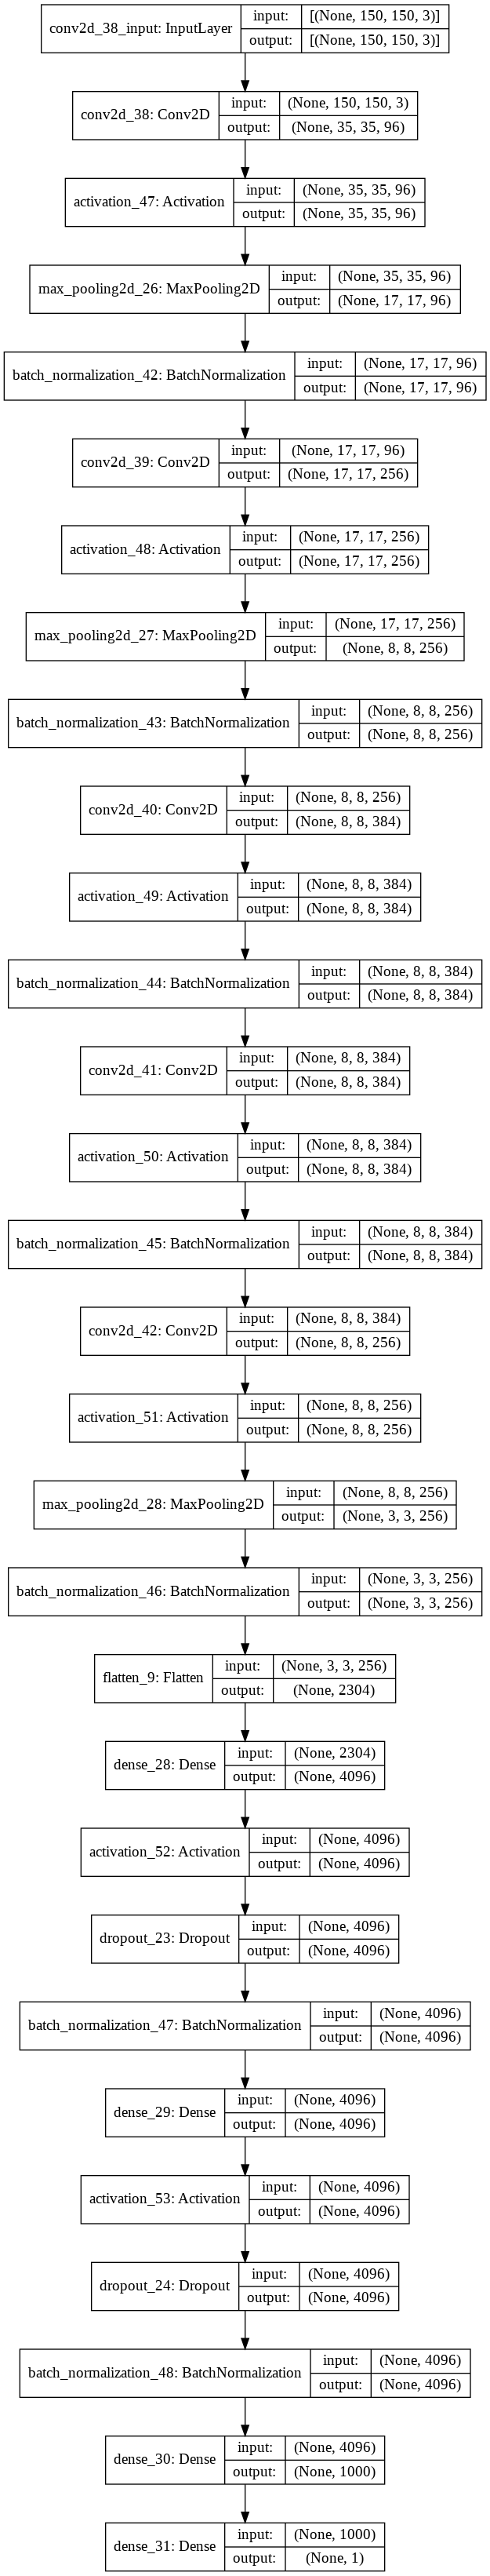

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, 'AlexNet model.png', show_shapes=True)

In [ ]:
#compile the Alexnet model
model_4.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=METRICS)

In [ ]:
#train the Alexnet model
history_4 = model_4.fit(train_generator,
                  epochs=30,
                  validation_data=validation_generator)

Epoch 1/30
46/46 [==============================] - 48s 994ms/step - loss: 3.4593 - accuracy: 0.7833 - precision: 0.8666 - recall: 0.7914 - auc: 0.8121 - f1_score: 0.8174 - val_loss: 345.0039 - val_accuracy: 0.3011 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000 - val_f1_score: 0.0000e+00
Epoch 2/30
46/46 [==============================] - 44s 962ms/step - loss: 0.7501 - accuracy: 0.9335 - precision: 0.9450 - recall: 0.9608 - auc: 0.9321 - f1_score: 0.9508 - val_loss: 4.9255 - val_accuracy: 0.8425 - val_precision: 0.8224 - val_recall: 0.9881 - val_auc: 0.7724 - val_f1_score: 0.8897
Epoch 3/30
46/46 [==============================] - 44s 959ms/step - loss: 0.3701 - accuracy: 0.9451 - precision: 0.9547 - recall: 0.9676 - auc: 0.9652 - f1_score: 0.9625 - val_loss: 0.4847 - val_accuracy: 0.8287 - val_precision: 0.9948 - val_recall: 0.7589 - val_auc: 0.9766 - val_f1_score: 0.8592
Epoch 4/30
46/46 [==============================] - 44s 971ms/step - loss: 0.1241 - accur

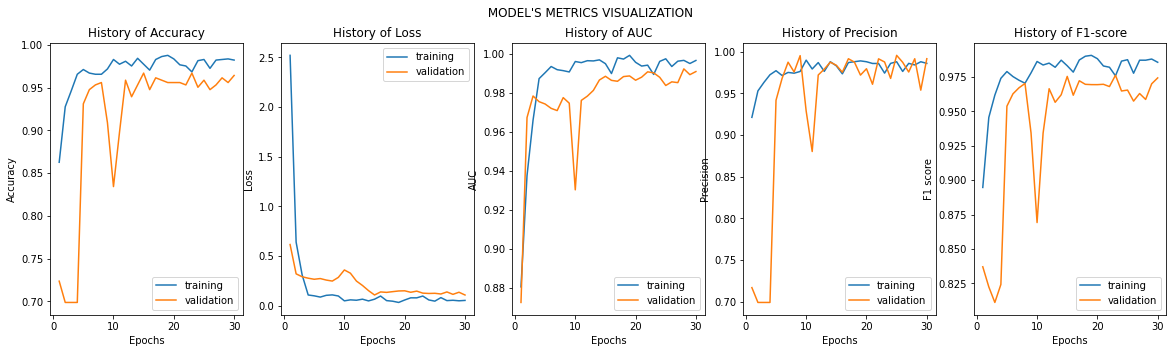

In [ ]:
Train_Val_Plot(history_4.history['accuracy'],history_1.history['val_accuracy'],
                 history_4.history['loss'],history_1.history['val_loss'],
                 history_4.history['auc'],history_1.history['val_auc'],
                 history_4.history['precision'],history_1.history['val_precision'],
                 history_4.history['f1_score'],history_1.history['val_f1_score']
                 )  

***Metrics comparison for Testing dataset***

In [ ]:
scores_4 = model_4.evaluate(test_generator)

16/16 [==============================] - 10s 594ms/step - loss: 1.5637 - accuracy: 0.7934 - precision: 1.0000 - recall: 0.6845 - auc: 0.9246 - f1_score: 0.8196


In [ ]:
print("AlexNet Accuracy = ", scores_4[1])
print("AlexNet Precision = ", scores_4[2])
print("AlexNet Recall = ", scores_4[3])
print("AlexNet AUC = ", scores_4[4])
print("AlexNet F1_score = ", scores_4[5])

AlexNet Accuracy =  0.7933884263038635
AlexNet Precision =  1.0
AlexNet Recall =  0.6845425963401794
AlexNet AUC =  0.9246396422386169
AlexNet F1_score =  0.8196222186088562


As we can see, Alexnet present a good accuracy, but still lower compared to the three CNN models.

***Prediction On New Data***

We use the best model, in this case CNN3 model, for predicting on new data.

In [ ]:
from google.colab import files 
from keras.preprocessing import image
import numpy as np
uploaded = files.upload()
for filename in uploaded.keys():
  img_path ='/content/'+filename
  img = image.load_img(img_path, target_size =(150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model_2.predict(images)
  print(filename)

  if prediction == 0:
    print('Covid diagnosis')
  else:
    print('Health status diagnosis')